In [56]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import multivariate_normal

data = pd.read_csv('./data/leukemia_big.csv')
data.shape

(7128, 72)

In [57]:
import os
os.getcwd()

'/data/notebook/mfa'

In [58]:
from module.MFA2 import MFA

## T-test

In [59]:
ALL_columns = [c for c in data.columns if 'ALL' in c]
AML_columns = [c for c in data.columns if 'AML' in c]
ttest_df = pd.DataFrame(columns=['sampleId','ttest'])
ttest ,pvalue = scipy.stats.ttest_ind(data.T.loc[ALL_columns], data.T.loc[AML_columns])
ttest_df = pd.DataFrame([ttest, pvalue], index=['ttest', 'pvalue']).T
select100 = ttest_df.sort_values('pvalue').iloc[:100].index
X = data.iloc[select100].values
np.random.seed(1234)

In [60]:
gene_type = data.iloc[select100].T.reset_index().rename(columns={'index':'gene_type'})

In [61]:
gene_type_true = np.argmax(pd.get_dummies(gene_type.gene_type.apply(lambda x: x.split('.')[0]))[['AML', 'ALL']].values, axis=1)

## Cluster Accuracy

In [64]:
def cluster_accuracy(true, cluster):
    ca = np.sum(true == cluster) / cluster.shape[0]
    return ca

## m_factor = 2, n_cluster = 2

completed log-likelihood :  4287.393481867767
completed log-likelihood :  8342.835017740152
completed log-likelihood :  10122.639310800056
completed log-likelihood :  10422.37047924953
completed log-likelihood :  10484.318193737136
completed log-likelihood :  10542.738900817994
completed log-likelihood :  10601.322205145001
completed log-likelihood :  10650.64108335115
completed log-likelihood :  10690.023309236149
completed log-likelihood :  10721.257876777807
completed log-likelihood :  10746.219986261713
completed log-likelihood :  10766.502490091287
completed log-likelihood :  10784.88196396034
completed log-likelihood :  10988.264918708268
completed log-likelihood :  11076.102131070598
completed log-likelihood :  11420.171246446243
completed log-likelihood :  11481.343144934177
completed log-likelihood :  11493.052620503615
completed log-likelihood :  11500.318664984621
completed log-likelihood :  11505.93055795109
completed log-likelihood :  11510.39504893509
completed log-likeli

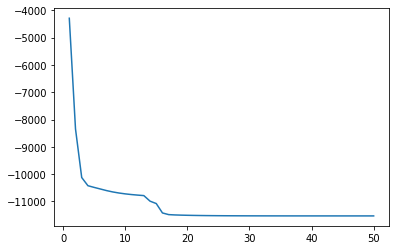

In [96]:
mfa = MFA(X, 2, 2)
mfa.fit(max_iter=50, tol_el=1e-2)
mfa.plot_loglikelihood()

## n_cluster = 2, n_factor = 6

In [97]:
mfa2 = MFA(X, n_cluster=2, n_factor=6)
mfa2.fit(max_iter=30)

completed log-likelihood :  4723.403708087256
completed log-likelihood :  8724.910346407536
completed log-likelihood :  10362.882684055754
completed log-likelihood :  10500.094756333772
completed log-likelihood :  10573.882312959624
completed log-likelihood :  10647.48604748762
completed log-likelihood :  10700.90617597624
completed log-likelihood :  10740.498704995078
completed log-likelihood :  10770.46185888394
completed log-likelihood :  10793.504752016059
completed log-likelihood :  10811.279425121578
completed log-likelihood :  10824.905122087404
completed log-likelihood :  10840.02832850629
completed log-likelihood :  11069.616345549619
completed log-likelihood :  11278.501224501106
completed log-likelihood :  11611.38579425975
completed log-likelihood :  12031.180076889668
completed log-likelihood :  12214.8031587033
completed log-likelihood :  12250.712464793878
completed log-likelihood :  12544.689130142146
completed log-likelihood :  12700.725544720748
completed log-likeliho

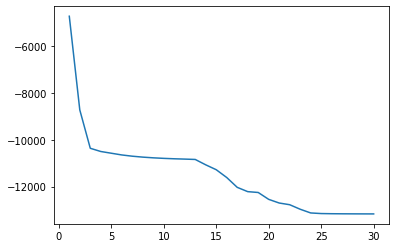

In [98]:
mfa2.plot_loglikelihood()

In [99]:
mfa2.Rjt.shape

(2, 72)

## n_factor = 4, n_cluster = 6

In [101]:
mfa3 = MFA(X, 6, 4)
mfa3.fit(max_iter=60)

completed log-likelihood :  5196.554339504602
completed log-likelihood :  9258.206633498345
completed log-likelihood :  10739.184589969012
completed log-likelihood :  11189.16149897882
completed log-likelihood :  11299.5162056366
completed log-likelihood :  11446.038941220111
completed log-likelihood :  11495.010777034524
completed log-likelihood :  11533.428185877718
completed log-likelihood :  11588.410258354083
completed log-likelihood :  11646.56500982116
completed log-likelihood :  11706.120144508257
completed log-likelihood :  11785.12847330325
completed log-likelihood :  11957.351070146862
completed log-likelihood :  12177.971366348373
completed log-likelihood :  12404.929532882868
completed log-likelihood :  12949.728498214343
completed log-likelihood :  13253.617916368588
completed log-likelihood :  13670.135287431644
completed log-likelihood :  13904.630492023016
completed log-likelihood :  13998.081668983554
completed log-likelihood :  14014.522378105457
completed log-likeli

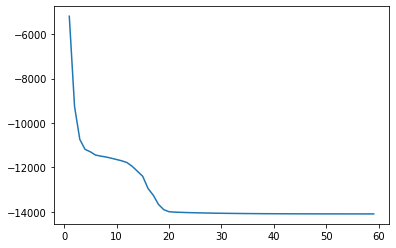

In [102]:
mfa3.plot_loglikelihood()

In [103]:
mfa4 = MFA(X, 7, 5)
mfa4.fit(max_iter=60)

completed log-likelihood :  5345.012663558867
completed log-likelihood :  9784.795791928538
completed log-likelihood :  11016.055911127458
completed log-likelihood :  11244.493644700831
completed log-likelihood :  11315.615128992788
completed log-likelihood :  11382.74656449042
completed log-likelihood :  11452.549295267232
completed log-likelihood :  11513.204156069412
completed log-likelihood :  11565.642495317414
completed log-likelihood :  11671.783723686583
completed log-likelihood :  11853.506907158979
completed log-likelihood :  11976.995633136572
completed log-likelihood :  12143.251613055845
completed log-likelihood :  12427.040693645731
completed log-likelihood :  12588.914945846875
completed log-likelihood :  13012.39971367164
completed log-likelihood :  13251.177050097935
completed log-likelihood :  13511.184548624631
completed log-likelihood :  13763.23491030265
completed log-likelihood :  14129.855064164245
completed log-likelihood :  14379.108482445137
completed log-like

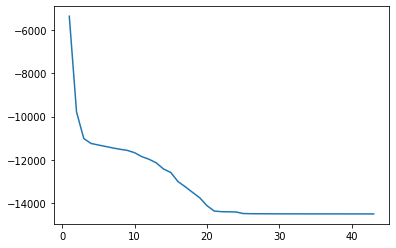

In [104]:
mfa4.plot_loglikelihood()

## MFA inferece

In [105]:
gene_type_cluster = np.argmax(mfa.Rjt.T, axis=1)

In [106]:
cluster_accuracy(gene_type_true, gene_type_cluster)

0.9583333333333334

In [107]:
valid_data = np.concatenate([mfa.X, gene_type_cluster.reshape(1,-1), gene_type_true.reshape(1, -1)], axis=0)
X_cluster_0 = valid_data[:, np.where(gene_type_cluster == 0)[0]]
X_cluster_1 = valid_data[:, np.where(gene_type_cluster == 1)[0]]
y_cluster = np.concatenate([X_cluster_0[100,:], X_cluster_1[100,:]])
y_true = np.concatenate([X_cluster_0[101,:], X_cluster_1[101,:]])

In [108]:
dim_reduction_c0 = (np.linalg.inv(mfa.A[0].T @ mfa.A[0]) @ mfa.A[0].T) @ (X_cluster_0[:100,:] - mfa.mu[0])
dim_reduction_c1 = (np.linalg.inv(mfa.A[1].T @ mfa.A[1]) @ mfa.A[1].T) @ (X_cluster_1[:100,:] - mfa.mu[1])

In [109]:
dimre_X = np.concatenate([dim_reduction_c0, dim_reduction_c1], axis=1)
dimre_X = np.concatenate([dimre_X, y_true.reshape(1,-1), y_cluster.reshape(1,-1)], axis=0)

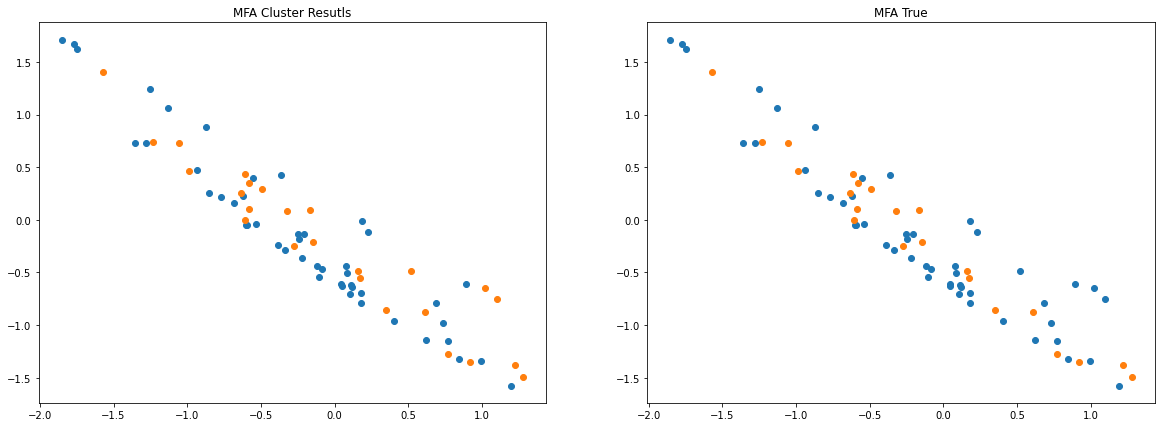

In [110]:
# fig = plt.figure(figsize=(15,10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
axes[0].scatter(dimre_X.T[np.where(dimre_X.T[:,2]==1), 0], dimre_X.T[np.where(dimre_X.T[:,2]==1), 1])
axes[0].scatter(dimre_X.T[np.where(dimre_X.T[:,2]==0), 0], dimre_X.T[np.where(dimre_X.T[:,2]==0), 1])
axes[1].scatter(dimre_X.T[np.where(dimre_X.T[:,3]==1), 0], dimre_X.T[np.where(dimre_X.T[:,3]==1), 1])
axes[1].scatter(dimre_X.T[np.where(dimre_X.T[:,3]==0), 0], dimre_X.T[np.where(dimre_X.T[:,3]==0), 1])
axes[0].set_title("MFA Cluster Resutls")
axes[1].set_title("MFA True")
plt.show()

In [117]:
gene_type_cluster2 = np.argmin(mfa2.Rjt.T, axis=1)

In [118]:
cluster_accuracy(gene_type_true, gene_type_cluster2)

0.9583333333333334